In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
import numpy as np
import cv2

In [ ]:
# 1. Compute the Scharr gradient magnitude representations in both the x and y direction.
# 2. Subtract the y-gradient from the x-gradient to reveal the barcoded region.
# 3. Blur and threshold the image.
# 4. Apply a closing kernel to the thresholded image.
# 5. Perform a series of dilations and erosions.
# 6. Find the largest contour in the image, which is now presumably the barcode.

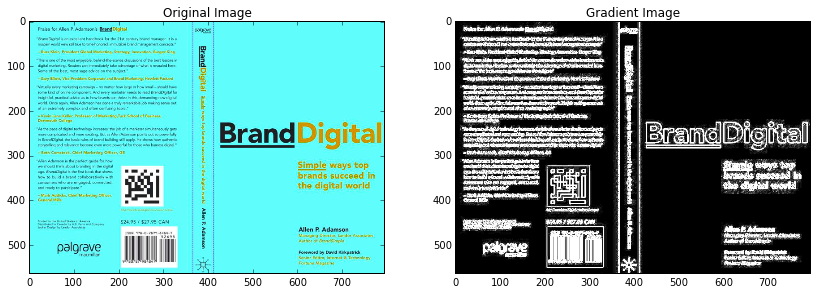

In [2]:
image = cv2.imread("./data/barcode1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.cv.CV_32F, dx = 0, dy = 1, ksize = -1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.figure(figsize=(14,10))
plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(gradient, cmap = 'gray')
plt.title('Gradient Image')

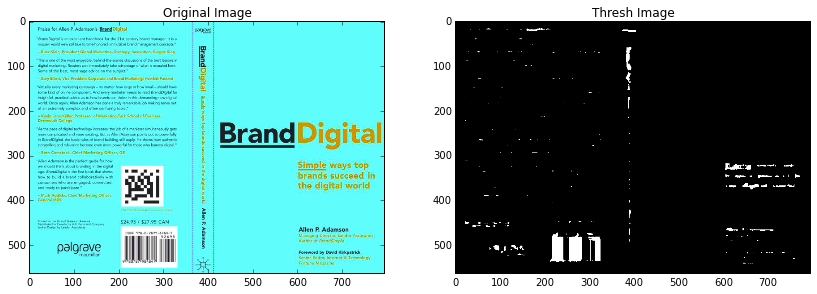

In [4]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(14,10))
plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122), plt.imshow(thresh, cmap = 'gray')
plt.title('Thresh Image')

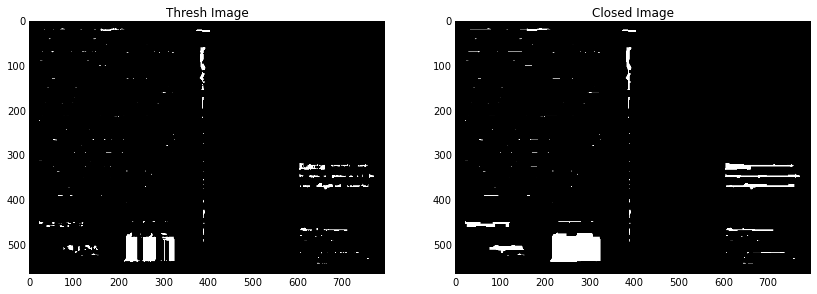

In [5]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(14,10))
plt.subplot(121), plt.imshow(thresh, cmap = 'gray')
plt.title('Thresh Image')
plt.subplot(122), plt.imshow(closed, cmap = 'gray')
plt.title('Closed Image')

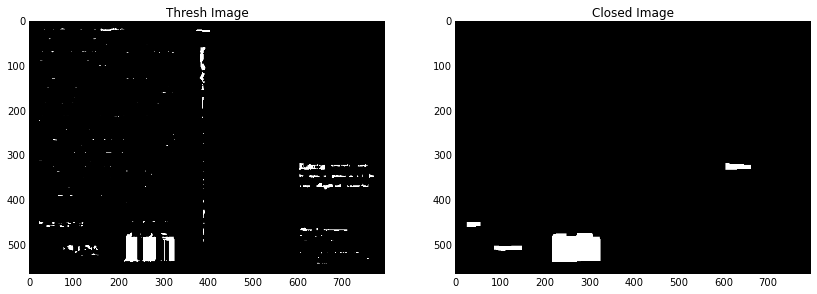

In [6]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

plt.figure(figsize=(14,10))
plt.subplot(121), plt.imshow(thresh, cmap = 'gray')
plt.title('Thresh Image')
plt.subplot(122), plt.imshow(closed, cmap = 'gray')
plt.title('Closed Image')

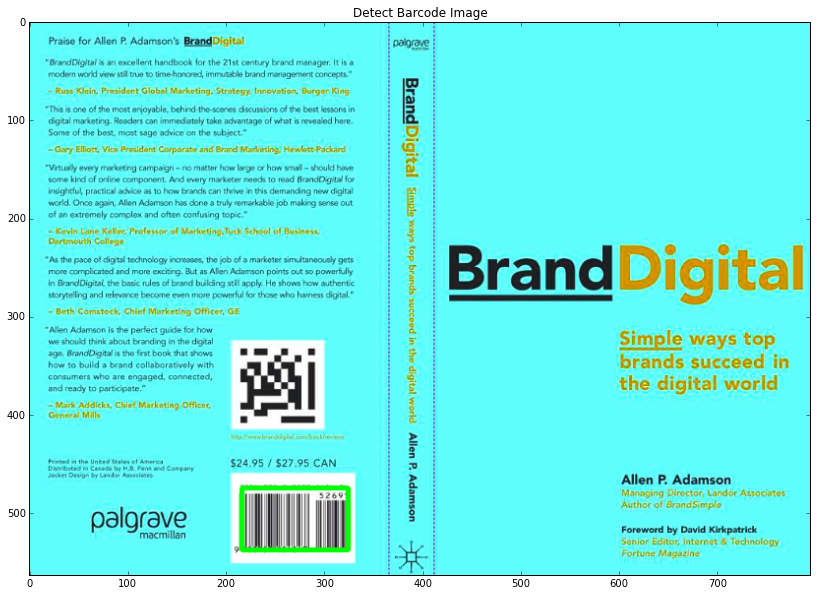

In [7]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.cv.BoxPoints(rect))
 
# draw a bounding box arounded the detected barcode and display the image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.figure(figsize=(14,10))
plt.subplot(111), plt.imshow(image, cmap = 'gray')
plt.title('Detect Barcode Image')